### 0) Import library and data set

In [4]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dateutil
from dateutil.relativedelta import relativedelta
import datetime
import squarify

In [5]:
# Import DataSet
df_loan = pd.read_csv("./data-set/loan.csv")

 ### 1) Data Understanding

In [6]:
# List Columns 
df_loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

*__Our Understanding of few key columns__*

<table>
<thead>
<tr>
  <th>Column Name</th>
  <th>Details</th>
</tr>
</thead>
<tbody>
<tr><td>collections_12_mths_ex_med</td><td>Number of collections in 12 months excluding medical collections. Can be ignored, mostly NA/0 values</td></tr>
<tr><td>funded_amnt</td><td>Amount that was funded by the investors. In few cases this will be lesser than the Loan Amount, the remianing amount is problably lent by LC dirctly</td></tr>
<tr><td>int_rate</td><td>Interest Rate on the loan</td></tr>
<tr><td>last_pymnt_amnt</td><td>Last total payment amount received. This will be 0 for Charged off</td></tr>
<tr><td>last_pymnt_d</td><td>Last month payment was received</td></tr>
<tr><td>loan_status</td><td>Current status of the loan</td></tr>
<tr><td>mths_since_last_major_derog</td><td>Months since most recent 90-day or worse rating</td></tr>
<tr><td>mths_since_last_record</td><td>months since the last (derogatory) public  records</td></tr>
<tr><td>open_acc</td><td>The number of open credit lines in the borrower's credit file. Ranges from 2 - 44</td></tr>
<tr><td>out_prncp_inv</td><td>Remaining outstanding principal for portion of total amount funded by investors</td></tr>
<tr><td>pub_rec</td><td>Number of derogatory public records.Another piece of data Lending Club provides is the number of public records on file. This is pulled from the credit report, so don’t confuse it with criminal public records. Credit report public records are things like bankruptcy, foreclosure, tax liens, and past-due child support.</td></tr>
<tr><td>recoveries</td><td>Recovery after defauls</td></tr>
<tr><td>revol_util</td><td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td></tr>
<tr><td>sub_grade</td><td>The majority of loans is either graded as B or C?—?together these correspond to more than 50% of the loan population.While there is a considerable amount of A graded or “prime” loans (~17%), there is a small amount of G graded, or “uncollectible” loans (~0,06%). </td></tr>
<tr><td>term</td><td>loan term.Only 2 term is available 36 months and 60 months</td></tr>
<tr><td>total_pymnt</td><td>Payments received to date for total amount funded</td></tr>
<tr><td>total_rec_int</td><td>Interest received to date</td></tr>
<tr><td>verification_status</td><td>Not verified, Verified (by LC) and Source verified are the options</td></tr>
</tbody>
</table>

 ### 2) Data cleaning & Manipulation

 ### 3) Data analysis

In [7]:
# Abhijith. Adding as it is required for my analysis. CAn be taken out if it is in the cleansing stage
df_loan['earliest_cr_line'] = pd.to_datetime(df_loan['earliest_cr_line'],format='%b-%y')
df_loan['issue_d'] = pd.to_datetime(df_loan['issue_d'],format='%b-%y')
df_loan['last_credit_pull_d'] = pd.to_datetime(df_loan['last_credit_pull_d'],format='%b-%y')
df_loan['last_pymnt_d'] = pd.to_datetime(df_loan['last_pymnt_d'],format='%b-%y')
df_loan['next_pymnt_d'] = pd.to_datetime(df_loan['next_pymnt_d'],format='%b-%y')
df_loan['earliest_cr_line_corrected'] = 0
df_loan.loc[df_loan['earliest_cr_line'] > '2019-01-01', 'earliest_cr_line_corrected'] = df_loan['earliest_cr_line'].dt.year-100
df_loan.loc[df_loan['earliest_cr_line'] < '2019-01-01', 'earliest_cr_line_corrected'] = df_loan['earliest_cr_line']
df_loan['earliest_cr_line_corrected'] = pd.to_datetime(df_loan['earliest_cr_line_corrected'])
df_loan['earliest_cr_line_corrected']
df_loan = df_loan.drop(['earliest_cr_line'],axis=1)
df_loan.rename(columns = {'earliest_cr_line_corrected':'earliest_cr_line'}, inplace = True)

In [8]:
# Abhijith. Adding a derived column to identify default. Can be taken out if it is in the cleansing stage
df_loan["default"]= np.where(df_loan['loan_status']=='Charged Off', 1, 0)
df_loan["default"].head()

0    0
1    1
2    0
3    0
4    0
Name: default, dtype: int32

In [9]:
# Abhijith. Adding a derived column to bin interest rates. Can be taken out if it is in the cleansing stage
df_loan['int_rate'] = df_loan['int_rate'].str.strip("%").astype(float)
df_loan[['int_rate']].max()
bins = [0,5,10,15,20,25]
df_loan['int_rate_binned'] = pd.cut(df_loan['int_rate'], bins=bins)

In [10]:
df_loan[['int_rate_binned','int_rate']].head()

,int_rate_binned,int_rate
0,"(10, 15]",10.65
1,"(15, 20]",15.27
2,"(15, 20]",15.96
3,"(10, 15]",13.49
4,"(10, 15]",12.69


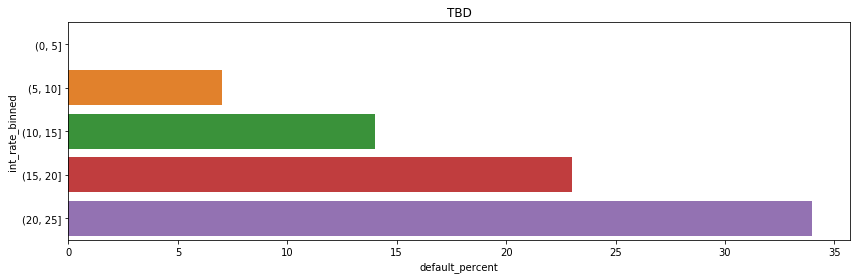

In [11]:
# Abhijith, Create bar graph to understand default against interest rates
fig, ax = plt.subplots()
fig.set_size_inches(14, 4)
df_loan_int = pd.DataFrame({'default_percent' : round(df_loan.groupby(['int_rate_binned'])['default'].sum()/df_loan.groupby(['int_rate_binned'])['default'].count(),2)*100}).reset_index()
ax = sns.barplot(x="default_percent",y="int_rate_binned",data=df_loan_int).set_title('TBD')

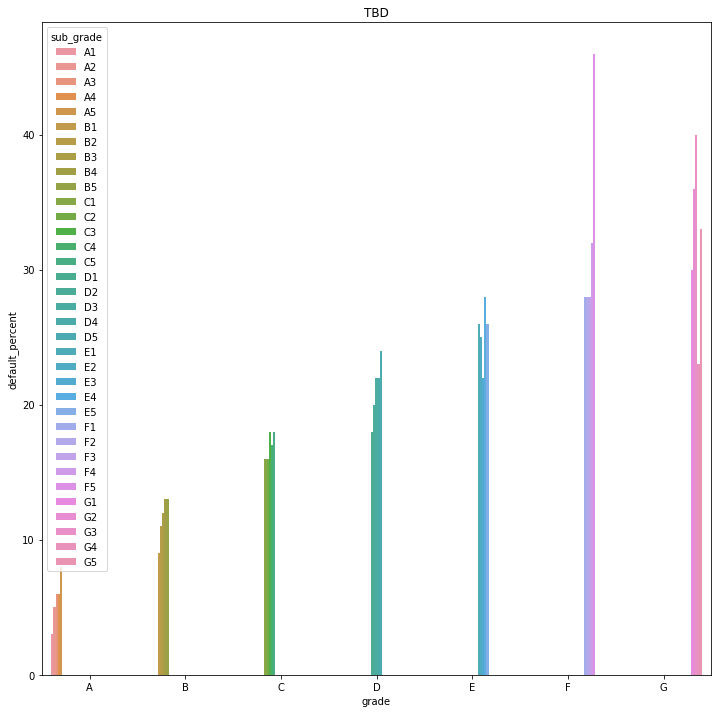

In [12]:
# Abhijith, Create bar graph to understand default against grades
fig, ax = plt.subplots()
fig.set_size_inches(12, 12)
df_loan_grade = pd.DataFrame({'default_percent' : round(df_loan.groupby(['grade','sub_grade'])['default'].sum()/df_loan.groupby(['grade','sub_grade'])['default'].count(),2)*100}).reset_index()
ax = sns.barplot(x="grade",y="default_percent",hue='sub_grade',data=df_loan_grade).set_title('TBD')

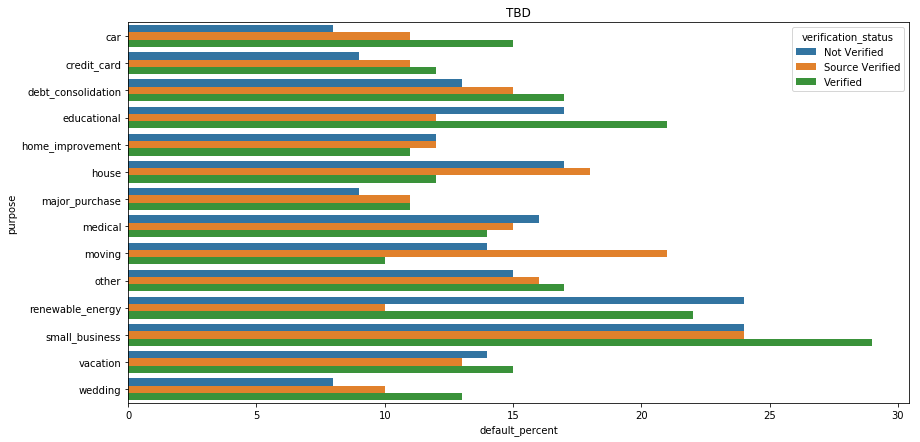

In [13]:
# Abhijith, Create segment plot to understand default against verification status, purpose
fig, ax = plt.subplots()
fig.set_size_inches(14, 7)
df_loan_vs = pd.DataFrame({'default_percent' : round(df_loan.groupby(['verification_status','purpose'])['default'].sum()/df_loan.groupby(['verification_status','purpose'])['default'].count(),2)*100}).reset_index()
ax = sns.barplot(x="default_percent",y="purpose",hue='verification_status',data=df_loan_vs).set_title('TBD')
#ax = sns.barplot(x="default_percent",y="verification_status",data=df_loan_vs).set_title('TBD')

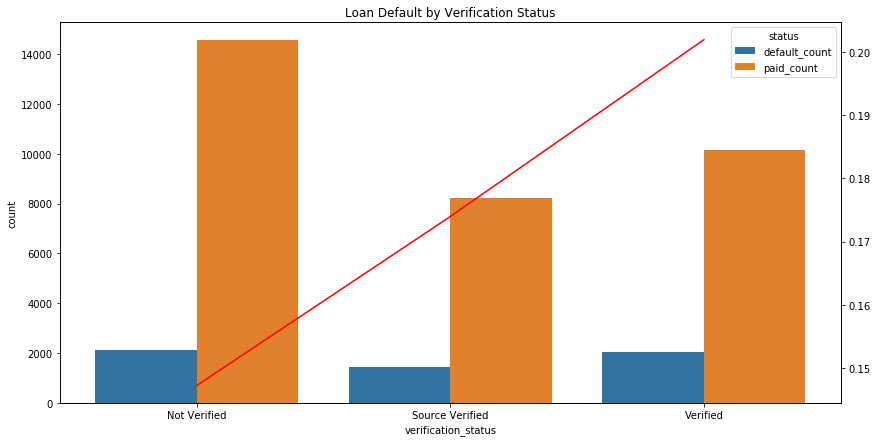

In [82]:
# Abhijith, Create segment plot to understand default against verification status
fig, ax = plt.subplots()
fig.set_size_inches(14, 7)
df_loan_vs = pd.DataFrame({'default_count' : df_loan.groupby(['verification_status'])['default'].sum(), 'paid_count' : df_loan[df_loan['loan_status']=='Fully Paid'].groupby(['verification_status'])['default'].count()}).reset_index()
df_loan_vs1 = pd.melt(df_loan_vs, id_vars=["verification_status"], 
                  var_name="status", value_name="count")
df_loan_vs1
ax = sns.barplot(x="verification_status",y="count",hue="status",data=df_loan_vs1,ci=None)
ax2 = ax.twinx()
ax2 = sns.lineplot(x="verification_status",y=df_loan_vs['default_count']/df_loan_vs['paid_count'],ax=ax2,color="red",data=df_loan_vs,ci=None).set_title('Loan Default by Verification Status')
plt.show()


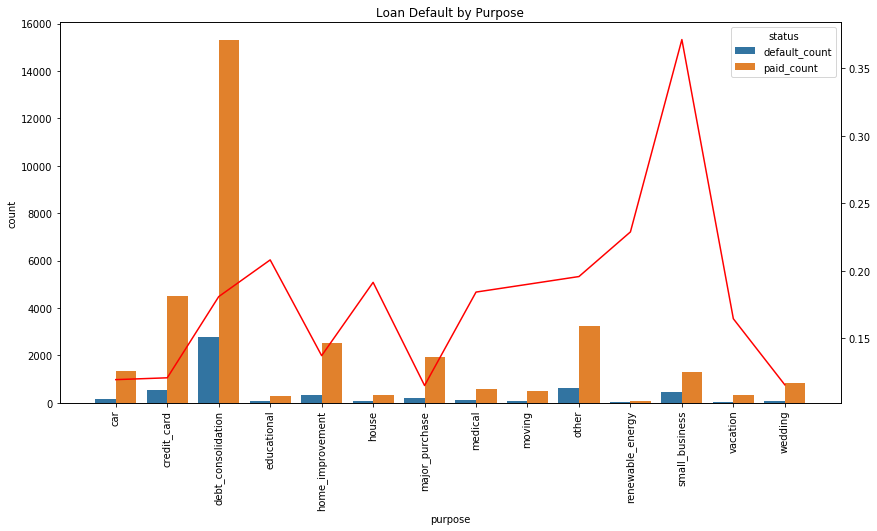

In [80]:
# Abhijith, Create segment plot to understand default against purpose
fig, ax = plt.subplots()
fig.set_size_inches(14, 7)
df_loan_ps = pd.DataFrame({'default_count' : df_loan.groupby(['purpose'])['default'].sum(), 'paid_count' : df_loan[df_loan['loan_status']=='Fully Paid'].groupby(['purpose'])['default'].count()}).reset_index()
df_loan_ps1 = pd.melt(df_loan_ps, id_vars=["purpose"], 
                  var_name="status", value_name="count")
ax = sns.barplot(x="purpose",y="count",hue="status",data=df_loan_ps1,ci=None)
ax2 = ax.twinx()
ax2 = sns.lineplot(x="purpose",y=df_loan_ps['default_count']/df_loan_ps['paid_count'],ax=ax2,color="red",data=df_loan_ps,ci=None).set_title('Loan Default by Purpose')
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()


In [56]:
bins = [0,5,10,15,20,25,30]
df_loan['dti_binned'] = pd.cut(df_loan['dti'], bins=bins)

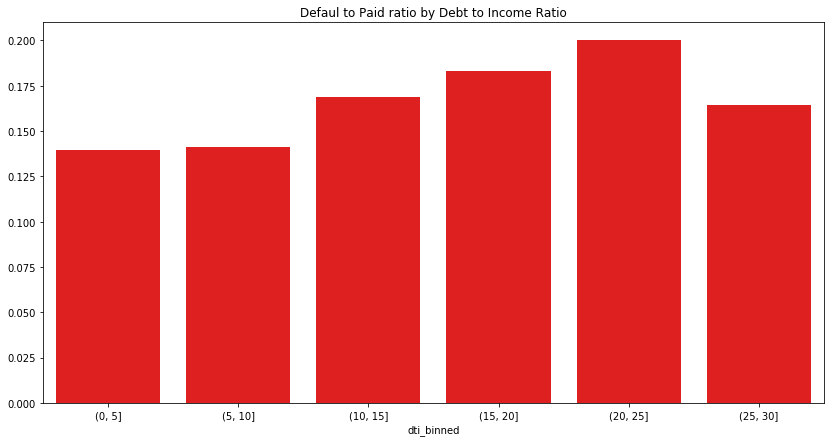

In [58]:
# Abhijith, Create segment plot to understand default against dti
fig, ax = plt.subplots()
fig.set_size_inches(14, 7)
df_loan_dti = pd.DataFrame({'default_percent' : round(df_loan.groupby(['dti_binned'])['default'].sum()/df_loan.groupby(['dti_binned'])['default'].count(),2)*100, 'paid_percent' : round(df_loan[df_loan['loan_status']=='Fully Paid'].groupby(['dti_binned'])['default'].count()/df_loan.groupby(['dti_binned'])['default'].count(),2)*100}).reset_index()
df_loan_dti1 = pd.melt(df_loan_dti, id_vars=["dti_binned"], 
                  var_name="status", value_name="percent")
ax = sns.barplot(x="dti_binned",y=df_loan_dti['default_percent']/df_loan_dti['paid_percent'],color="red",data=df_loan_dti,ci=None).set_title('Default to Paid ratio by Debt to Income Ratio')
plt.show()

In [61]:
df_loan['revol_util'] = df_loan['revol_util'].str.split('%',n=1,expand=True)
df_loan['revol_util'] = df_loan['revol_util'].astype(float)

In [63]:
df_loan[['revol_util']].min()

revol_util    0.0
dtype: float64

In [68]:
bins = [0,10,20,30,40,50,60,70,80,90,100]
df_loan['revol_util_binned'] = pd.cut(df_loan['revol_util'], bins=bins)
df_loan['revol_util_binned'].head()

0     (80, 90]
1      (0, 10]
2    (90, 100]
3     (20, 30]
4     (50, 60]
Name: revol_util_binned, dtype: category
Categories (10, interval[int64]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] ... (60, 70] < (70, 80] < (80, 90] < (90, 100]]

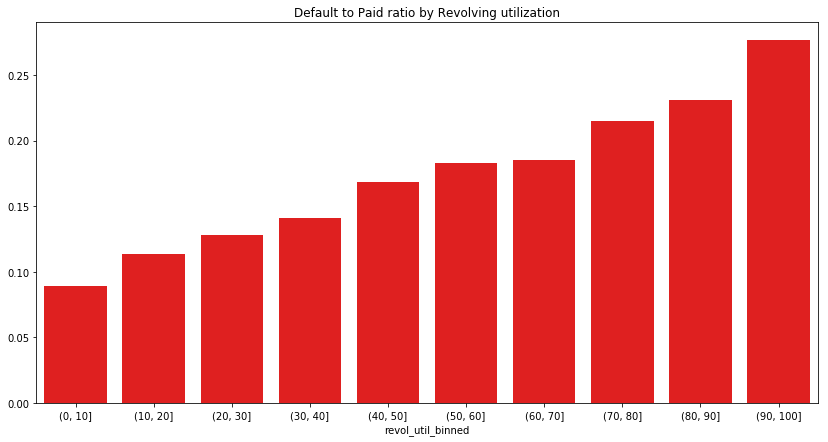

In [69]:
# Abhijith, Create segment plot to understand default against revolving utilization
fig, ax = plt.subplots()
fig.set_size_inches(14, 7)
df_loan_ru = pd.DataFrame({'default_percent' : round(df_loan.groupby(['revol_util_binned'])['default'].sum()/df_loan.groupby(['revol_util_binned'])['default'].count(),2)*100, 'paid_percent' : round(df_loan[df_loan['loan_status']=='Fully Paid'].groupby(['revol_util_binned'])['default'].count()/df_loan.groupby(['revol_util_binned'])['default'].count(),2)*100}).reset_index()
df_loan_ru1 = pd.melt(df_loan_ru, id_vars=["revol_util_binned"], 
                  var_name="status", value_name="percent")
ax = sns.barplot(x="revol_util_binned",y=df_loan_ru['default_percent']/df_loan_ru['paid_percent'],color="red",data=df_loan_ru,ci=None).set_title('Default to Paid ratio by Revolving utilization')
plt.show()

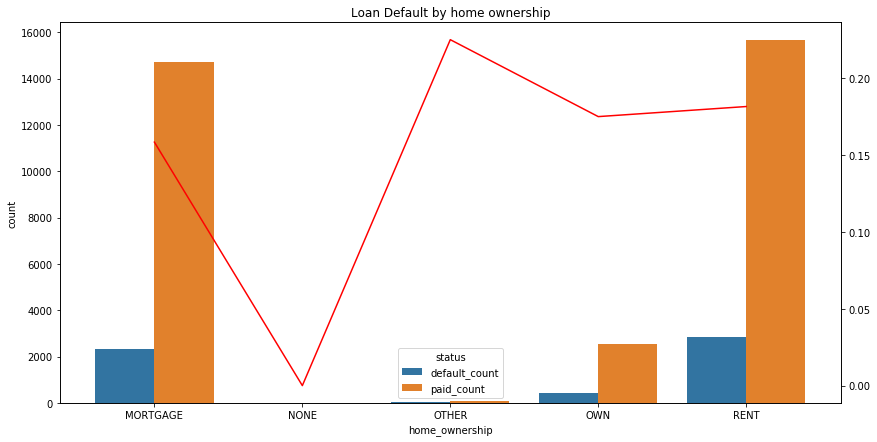

In [77]:
# Abhijith, Create segment plot to understand default against home ownership
fig, ax = plt.subplots()
fig.set_size_inches(14, 7)
df_loan_ho = pd.DataFrame({'default_count' : df_loan.groupby(['home_ownership'])['default'].sum(), 'paid_count' : df_loan[df_loan['loan_status']=='Fully Paid'].groupby(['home_ownership'])['default'].count()}).reset_index()
df_loan_ho1 = pd.melt(df_loan_ho, id_vars=["home_ownership"], 
                  var_name="status", value_name="count")
ax = sns.barplot(x="home_ownership",y="count",hue="status",data=df_loan_ho1)
ax2 = ax.twinx()
ax2 = sns.lineplot(x="home_ownership",y=df_loan_ho['default_count']/df_loan_ho['paid_count'],ax=ax2,color="red",data=df_loan_ho,ci=None).set_title('Loan Default by home ownership')
plt.show()

,home_ownership,dti,default_percent,paid_percent
0,MORTGAGE,0.00,11.0,85.0
1,MORTGAGE,0.01,0.0,100.0
2,MORTGAGE,0.02,0.0,100.0
3,MORTGAGE,0.03,0.0,100.0
4,MORTGAGE,0.04,0.0,100.0
5,MORTGAGE,0.05,0.0,100.0
6,MORTGAGE,0.07,0.0,100.0
7,MORTGAGE,0.08,0.0,100.0
8,MORTGAGE,0.09,0.0,100.0
9,MORTGAGE,0.11,0.0,100.0


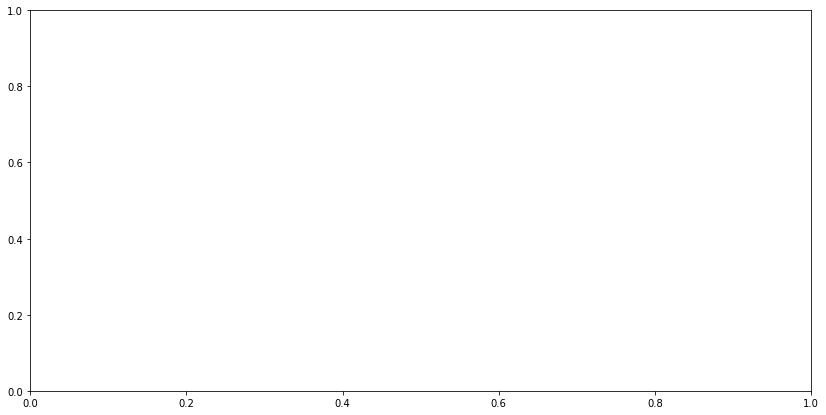

In [16]:
# Abhijith, Create segment plot to understand default against home ownership, dti
fig, ax = plt.subplots()
fig.set_size_inches(14, 7)
df_loan_ho = pd.DataFrame({'default_percent' : round(df_loan.groupby(['home_ownership','dti'])['default'].sum()/df_loan.groupby(['home_ownership','dti'])['default'].count(),2)*100, 'paid_percent' : round(df_loan[df_loan['loan_status']=='Fully Paid'].groupby(['home_ownership','dti'])['default'].count()/df_loan.groupby(['home_ownership','dti'])['default'].count(),2)*100}).reset_index()
#df_loan_ho1 = pd.melt(df_loan_vs, id_vars=["home_ownership", "dti"], 
 #                 var_name="status", value_name="percent")
df_loan_ho
#ax = sns.barplot(x="home_ownership",y="percent",hue="status",data=df_loan_ho1,ci=None).set_title('TBD')


In [ ]:
# Data Cleaning Phase - Formatting the date columns

In [ ]:
# Data Cleaning Phase - Converting numeric data to the appropriate types

In [ ]:
# Data Cleaning Phase - Adding derived metrics

In [ ]:
# Data Prep Phase - Binning columns

In [3]:
df_loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [4]:
df_loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [5]:
ser = df_loan.isnull().sum()
df_new = pd.DataFrame(ser)
df_new.reset_index(inplace=True)
columns=df_new[df_new[0] == 39717]
columns=np.array(columns['index'])
df_loan = df_loan.drop(columns,axis=1)
#dropping collections_12_mths_ex_med as all values are either 0 or NA
df_loan = df_loan.drop(['collections_12_mths_ex_med'],axis=1)
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,NaN,May-16,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,NaN,Sep-13,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,NaN,May-16,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,NaN,Apr-16,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,Jun-16,May-16,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [6]:
#There are no rows having more than 6 values as Null
df_loan[df_loan.isnull().sum(axis=1) > 7]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [7]:
#Cleaning up date columns
df_loan[['id','earliest_cr_line','term','issue_d','last_credit_pull_d','last_pymnt_d','next_pymnt_d']].head()


,id,earliest_cr_line,term,issue_d,last_credit_pull_d,last_pymnt_d,next_pymnt_d
0,1077501,Jan-85,36 months,Dec-11,May-16,Jan-15,NaN
1,1077430,Apr-99,60 months,Dec-11,Sep-13,Apr-13,NaN
2,1077175,Nov-01,36 months,Dec-11,May-16,Jun-14,NaN
3,1076863,Feb-96,36 months,Dec-11,Apr-16,Jan-15,NaN
4,1075358,Jan-96,60 months,Dec-11,May-16,May-16,Jun-16


In [8]:
df_loan[['id','earliest_cr_line','term','issue_d','last_credit_pull_d','last_pymnt_d','next_pymnt_d']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 7 columns):
id                    39717 non-null int64
earliest_cr_line      39717 non-null object
term                  39717 non-null object
issue_d               39717 non-null object
last_credit_pull_d    39715 non-null object
last_pymnt_d          39646 non-null object
next_pymnt_d          1140 non-null object
dtypes: int64(1), object(6)
memory usage: 2.1+ MB


In [9]:
df_loan['earliest_cr_line'] = pd.to_datetime(df_loan['earliest_cr_line'],format='%b-%y')
df_loan['issue_d'] = pd.to_datetime(df_loan['issue_d'],format='%b-%y')
df_loan['last_credit_pull_d'] = pd.to_datetime(df_loan['last_credit_pull_d'],format='%b-%y')
df_loan['last_pymnt_d'] = pd.to_datetime(df_loan['last_pymnt_d'],format='%b-%y')
df_loan['next_pymnt_d'] = pd.to_datetime(df_loan['next_pymnt_d'],format='%b-%y')

In [10]:
df_loan[['id','earliest_cr_line','term','issue_d','last_credit_pull_d','last_pymnt_d','next_pymnt_d']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 7 columns):
id                    39717 non-null int64
earliest_cr_line      39717 non-null datetime64[ns]
term                  39717 non-null object
issue_d               39717 non-null datetime64[ns]
last_credit_pull_d    39715 non-null datetime64[ns]
last_pymnt_d          39646 non-null datetime64[ns]
next_pymnt_d          1140 non-null datetime64[ns]
dtypes: datetime64[ns](5), int64(1), object(1)
memory usage: 2.1+ MB


In [11]:
df_loan[['id','earliest_cr_line','term','issue_d','last_credit_pull_d','last_pymnt_d','next_pymnt_d']].head()

,id,earliest_cr_line,term,issue_d,last_credit_pull_d,last_pymnt_d,next_pymnt_d
0,1077501,1985-01-01,36 months,2011-12-01,2016-05-01,2015-01-01,NaT
1,1077430,1999-04-01,60 months,2011-12-01,2013-09-01,2013-04-01,NaT
2,1077175,2001-11-01,36 months,2011-12-01,2016-05-01,2014-06-01,NaT
3,1076863,1996-02-01,36 months,2011-12-01,2016-04-01,2015-01-01,NaT
4,1075358,1996-01-01,60 months,2011-12-01,2016-05-01,2016-05-01,2016-06-01


In [12]:
df_loan[df_loan['earliest_cr_line'] > '2019-01-01']["earliest_cr_line"]=df_loan[df_loan['earliest_cr_line'] > '2019-01-01']['earliest_cr_line'].dt.year-100

In [13]:
df_loan[df_loan['earliest_cr_line'] == '2062-09-01']['earliest_cr_line'] = df_loan[df_loan['earliest_cr_line'] == '2062-09-01']['earliest_cr_line'].dt.year-100
df_loan[df_loan['earliest_cr_line'] == '2062-09-01']['earliest_cr_line'] 

1576    2062-09-01
7872    2062-09-01
11303   2062-09-01
24701   2062-09-01
Name: earliest_cr_line, dtype: datetime64[ns]

In [29]:
df_group = df_loan[['grade','loan_status']]

TypeError: Empty 'DataFrame': no numeric data to plot

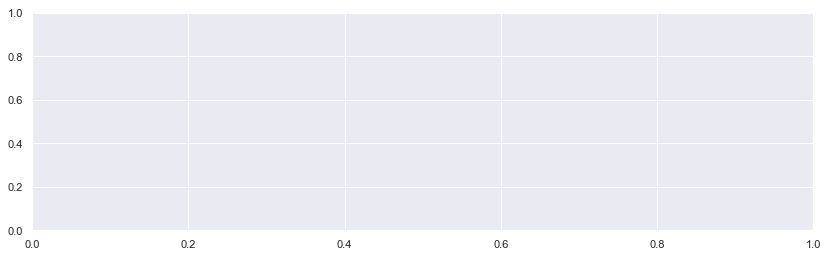

In [30]:
fig, ax = plt.subplots() 
fig.set_size_inches(14, 4)
sns.set() 
df_group.set_index('loan_status').T.plot(kind='bar', stacked=True)

In [14]:
df_loan.to_csv("./data-set/clean_loan.csv")

In [15]:
df_loan["title"].isnull().sum()

11

In [16]:
df_loan.title.nunique()

19615

In [17]:
df_loan.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [18]:
df_loan.groupby(['loan_status', 'emp_length', 'purpose']).id.count()

loan_status  emp_length  purpose           
Charged Off  1 year      car                     17
                         credit_card             39
                         debt_consolidation     209
                         educational              5
                         home_improvement        27
                         house                    5
                         major_purchase          20
                         medical                 11
                         moving                  12
                         other                   55
                         renewable_energy         2
                         small_business          51
                         wedding                  3
             10+ years   car                     32
                         credit_card            123
                         debt_consolidation     704
                         educational              4
                         home_improvement       102
                    

In [19]:
df_loan.groupby(["loan_status","delinq_2yrs","verification_status","inq_last_6mths"]).id.count()

loan_status  delinq_2yrs  verification_status  inq_last_6mths
Charged Off  0            Not Verified         0                 756
                                               1                 551
                                               2                 304
                                               3                 218
                                               4                  23
                                               5                  11
                                               6                   5
                                               7                   3
                                               8                   1
                          Source Verified      0                 515
                                               1                 379
                                               2                 230
                                               3                 128
                                         

In [20]:
df_loan.groupby(["loan_status","delinq_2yrs","verification_status","inq_last_6mths"]).agg({'id':['count'], 'funded_amnt':['sum']})

id funded_amnt
                                                           count         sum
loan_status delinq_2yrs verification_status inq_last_6mths                  
Charged Off 0           Not Verified        0                756     6414475
                                            1                551     4668325
                                            2                304     2635850
                                            3                218     1804375
                                            4                 23      249275
                                            5                 11      169850
                                            6                  5       47500
                                            7                  3       35800
                                            8                  1       20000
                        Source Verified     0                515     5425275
                                            1                379     4000875
                                            2                230     2289775
                                            3                128     1259450
                                            4                  7       84000
                                            5                  5       83025
                                            6                  2        9900
                                            7                  4       75000
                        Verified            0                732    11917175
                                            1                537     8838100
                                            2                297     4697350
                                            3                185     2796225
                                            4                 19      377175
                                            5                 12      243100
                                            6                  8      134550
                                            7                  2       27000
                                            8                  2       39000
            1           Not Verified        0                 72      595925
                                            1                 59      453900
                                            2                 33      236300
                                            3                 30      241575
...                                                          ...         ...
Fully Paid  4           Source Verified     0                  7       86725
                                            1                  5       39000
                                            2                  2       18000
                                            3                  3       15500
                        Verified            0                  6       69000
                                            1                  4       47725
                                            2                  2       16000
                                            3                  1        6000
                                            5                  1       12000
            5           Not Verified        0                  6       44500
                                            1                  2        9200
                        Source Verified     0                  1       10000
                                            1                  1        7000
                        Verified            0                  1        1800
                                            1                  3       22050
                                            2                  1        6000
                                            3                  3       43325
            6           Not Verified        0                  3       13000
                                            3             

In [21]:
df_loan.groupby(["loan_status","addr_state","home_ownership"]).agg({"id":["count"], "funded_amnt":["sum"]})

id funded_amnt
                                      count         sum
loan_status addr_state home_ownership                  
Charged Off AK         MORTGAGE           9      131825
                       OWN                1       20000
                       RENT               5       50050
            AL         MORTGAGE          28      416300
                       OWN               10      102400
                       RENT              16      171775
            AR         MORTGAGE          11      124025
                       OTHER              1        9375
                       OWN                3       36150
                       RENT              12       85850
            AZ         MORTGAGE          59      786175
                       OTHER              2       35000
                       OWN                6       71250
                       RENT              56      527325
            CA         MORTGAGE         325     4496150
                       OTHER              4       52150
                       OWN               72      879100
                       RENT             724     7926325
            CO         MORTGAGE          46      676800
                       OTHER              2       16675
                       OWN                4       33375
                       RENT              46      482200
            CT         MORTGAGE          44      523075
                       OWN                8       65325
                       RENT              42      436250
            DC         MORTGAGE           1        7500
                       RENT              14      197000
            DE         MORTGAGE           8      110700
                       RENT               4       23200
            FL         MORTGAGE         224     3110275
...                                     ...         ...
Fully Paid  TN         RENT               7       37700
            TX         MORTGAGE        1277    16014900
                       OTHER              5       20075
                       OWN              218     1962900
                       RENT             843     7919050
            UT         MORTGAGE         135     1451150
                       OWN                4       49400
                       RENT              73      649975
            VA         MORTGAGE         560     6702275
                       NONE               1       10000
                       OTHER              5       66500
                       OWN               77      786025
                       RENT             549     5447000
            VT         MORTGAGE          21      220475
                       OTHER              2       26000
                       OWN                2       15000
                       RENT              22      153225
            WA         MORTGAGE         298     3491050
                       OWN               30      274175
                       RENT             363     3282600
            WI         MORTGAGE         192     2242750
                       OTHER              1        1200
                       OWN               19      177300
                       RENT             165     1547175
            WV         MORTGAGE          88     1031850
                       OWN               17      170225
                       RENT              46      345275
            WY         MORTGAGE          44      493200
                       OWN                7       87000
                       RENT              25      190900

[429 rows x 2 columns]

In [22]:
df1 = df_loan[['installment', 'emp_title', 'emp_length', 'url', 'title', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'revol_bal', 'initial_list_status', 'total_rec_prncp', 'total_rec_late_fee', 'policy_code', 'funded_amnt', 'term', 'verification_status', 'loan_status', 'desc', 'zip_code', 'mths_since_last_record', 'open_acc', 'out_prncp_inv', 'total_pymnt', 'collection_recovery_fee', 'last_pymnt_amnt', 'mths_since_last_major_derog', 'application_type', 'id', 'int_rate', 'sub_grade', 'purpose', 'pub_rec', 'revol_util', 'total_rec_int', 'recoveries', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'member_id', 'loan_amnt', 'funded_amnt_inv', 'grade', 'home_ownership', 'annual_inc', 'issue_d', 'pymnt_plan', 'addr_state', 'mths_since_last_delinq', 'total_acc', 'out_prncp', 'total_pymnt_inv']]

KeyError: "['mths_since_last_major_derog' 'collections_12_mths_ex_med'] not in index"

In [ ]:
df1.head()

In [ ]:
df_fully_paid = df1[df1.loan_status == "Fully Paid"]
df_Charged_off = df1[df1.loan_status == "Charged Off"]
df_Current = df1[df1.loan_status == "Current"]

In [ ]:
df_fully_paid.shape -- (32950, 53)
df_Charged_off.shape -- (5627, 53)
df_Current.shape -- (1140, 53)

In [ ]:
df2 =  df_Charged_off.corr(method = "pearson")

In [ ]:
df2

In [ ]:
df_3 = pd.read_csv("C:\\Users\\I324893\\Documents\\GitHub\\data-analysis\\case-study-2\\data-set\\loan.csv")
df3 = df_3[['installment', 'emp_title', 'emp_length', 'url', 'title', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'revol_bal', 'initial_list_status', 'total_rec_prncp', 'total_rec_late_fee', 'policy_code', 'funded_amnt', 'term', 'verification_status', 'loan_status', 'desc', 'zip_code', 'mths_since_last_record', 'open_acc', 'out_prncp_inv', 'total_pymnt', 'collection_recovery_fee', 'last_pymnt_amnt', 'mths_since_last_major_derog', 'application_type', 'id', 'int_rate', 'sub_grade', 'purpose', 'pub_rec', 'revol_util', 'total_rec_int', 'recoveries', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'member_id', 'loan_amnt', 'funded_amnt_inv', 'grade', 'home_ownership', 'annual_inc', 'issue_d', 'pymnt_plan', 'addr_state', 'mths_since_last_delinq', 'total_acc', 'out_prncp', 'total_pymnt_inv']]

In [ ]:
df3["emp_length"] = np.where(df3["emp_length"] == "< 1 year", 0, df3["emp_length"])
df3["emp_length"] = np.where(df3["emp_length"] == "1 year", 1, df3["emp_length"])
df3["emp_length"] = np.where(df3["emp_length"] == "2 years", 2, df3["emp_length"])
df3["emp_length"] = np.where(df3["emp_length"] == "3 years", 3, df3["emp_length"])
df3["emp_length"] = np.where(df3["emp_length"] == "4 years", 4, df3["emp_length"])
df3["emp_length"] = np.where(df3["emp_length"] == "5 years", 5, df3["emp_length"])
df3["emp_length"] = np.where(df3["emp_length"] == "6 years", 6, df3["emp_length"])
df3["emp_length"] = np.where(df3["emp_length"] == "7 years", 7, df3["emp_length"])
df3["emp_length"] = np.where(df3["emp_length"] == "8 years", 8, df3["emp_length"])
df3["emp_length"] = np.where(df3["emp_length"] == "9 years", 9, df3["emp_length"])
df3["emp_length"] = np.where(df3["emp_length"] == "10+ years", 10, df3["emp_length"])

df3["loan_status"] = np.where(df3["loan_status"] == "Fully Paid", 1, df3["loan_status"])
df3["loan_status"] = np.where(df3["loan_status"] == "Current", 2, df3["loan_status"])
df3["loan_status"] = np.where(df3["loan_status"] == "Charged Off", 3, df3["loan_status"])

df3["purpose"] = np.where(df3["purpose"] == "debt_consolidation", 1, df3["purpose"])
df3["purpose"] = np.where(df3["purpose"] == "credit_card", 2, df3["purpose"])
df3["purpose"] = np.where(df3["purpose"] == "other", 3, df3["purpose"])
df3["purpose"] = np.where(df3["purpose"] == "home_improvement", 4, df3["purpose"])
df3["purpose"] = np.where(df3["purpose"] == "major_purchase", 5, df3["purpose"])
df3["purpose"] = np.where(df3["purpose"] == "small_business", 6, df3["purpose"])
df3["purpose"] = np.where(df3["purpose"] == "car", 7, df3["purpose"])
df3["purpose"] = np.where(df3["purpose"] == "wedding", 8, df3["purpose"])
df3["purpose"] = np.where(df3["purpose"] == "medical", 9, df3["purpose"])
df3["purpose"] = np.where(df3["purpose"] == "moving", 10, df3["purpose"])
df3["purpose"] = np.where(df3["purpose"] == "house", 11, df3["purpose"])
df3["purpose"] = np.where(df3["purpose"] == "vacation", 12, df3["purpose"])
df3["purpose"] = np.where(df3["purpose"] == "educational", 13, df3["purpose"])
df3["purpose"] = np.where(df3["purpose"] == "renewable_energy", 14, df3["purpose"])

df3["grade"] = np.where(df3["grade"] == "A", 1, df3["grade"])
df3["grade"] = np.where(df3["grade"] == "B", 2, df3["grade"])
df3["grade"] = np.where(df3["grade"] == "C", 3, df3["grade"])
df3["grade"] = np.where(df3["grade"] == "D", 4, df3["grade"])
df3["grade"] = np.where(df3["grade"] == "E", 5, df3["grade"])
df3["grade"] = np.where(df3["grade"] == "F", 6, df3["grade"])
df3["grade"] = np.where(df3["grade"] == "G", 7, df3["grade"])

df3["verification_status"] = np.where(df3["verification_status"] == "Not Verified", 1, df3["verification_status"])
df3["verification_status"] = np.where(df3["verification_status"] == "Verified", 2, df3["verification_status"])
df3["verification_status"] = np.where(df3["verification_status"] == "Source Verified", 3, df3["verification_status"])

df3["home_ownership"] = np.where(df3["home_ownership"] == "RENT", 1, df3["home_ownership"])
df3["home_ownership"] = np.where(df3["home_ownership"] == "MORTGAGE", 2, df3["home_ownership"])
df3["home_ownership"] = np.where(df3["home_ownership"] == "OWN", 3, df3["home_ownership"])
df3["home_ownership"] = np.where(df3["home_ownership"] == "OTHER", 4, df3["home_ownership"])
df3["home_ownership"] = np.where(df3["home_ownership"] == "NONE", 5, df3["home_ownership"])

In [ ]:
df3.purpose.value_counts()

In [ ]:
df3['emp_length'] = df3['emp_length'].astype(float)
sns.boxplot(x = "purpose", y = "emp_length", data=df3)
plt.show()

In [ ]:
df3_Charged_off = df3[df3.loan_status == 3]
sns.boxplot(x = "purpose", y = "emp_length", data=df3_Charged_off)
plt.show()

In [ ]:
sns.boxplot(x = "grade", y = "emp_length", data=df3_Charged_off)
plt.show()

In [ ]:
sns.boxplot(x = "verification_status", y = "emp_length", data=df3_Charged_off)
plt.show()

In [ ]:
sns.boxplot(x = "inq_last_6mths", y = "emp_length", data=df3_Charged_off)
plt.show()

In [ ]:
sns.boxplot(x = "delinq_2yrs", y = "emp_length", data=df3_Charged_off)
plt.show()

In [ ]:
sns.boxplot(x = "addr_state", y = "emp_length", data=df3_Charged_off)
plt.show()

In [ ]:
sns.boxplot(x = "home_ownership", y = "emp_length", data=df3_Charged_off)
plt.show()

In [ ]:
df3_Charged_off['purpose'] = df3_Charged_off['purpose'].astype(float)
sns.jointplot(x = "purpose", y ="installment" , data=df3_Charged_off)
plt.show()

In [ ]:
df3_Charged_off['home_ownership'] = df3_Charged_off['home_ownership'].astype(float)
sns.jointplot(x = "home_ownership", y ="installment" , data=df3_Charged_off)
plt.show()

In [ ]:
sns.jointplot(x = "loan_amnt", y ="annual_inc" , data=df3_Charged_off)
plt.show()

In [ ]:
sns.barplot(x = "loan_amnt", y ="annual_inc" , hue="loan_status",data=df3)
plt.show()

In [ ]:
df3_Charged_off['grade'] = df3_Charged_off['grade'].astype(float)
sns.jointplot(x = "grade", y ="installment" , data=df3_Charged_off)
plt.show()

In [ ]:
df3_Charged_off['verification_status'] = df3_Charged_off['verification_status'].astype(float)
sns.jointplot(x = "verification_status", y ="installment" , data=df3_Charged_off)
plt.show()

In [ ]:
sns.jointplot(x = "collection_recovery_fee", y ="installment" , data=df3_Charged_off)
plt.show()

In [ ]:
sns.jointplot(x = "collection_recovery_fee", y ="installment" , data=df3)
plt.show()

In [ ]:
#df3_Charged_off.int_rate.value_counts()
df3_Charged_off['int_rate'] = df3_Charged_off['int_rate'].str.strip("%").astype(float)
sns.jointplot(x = "int_rate", y ="installment" , data=df3_Charged_off)
plt.show()

In [ ]:
sns.jointplot(x = "emp_length", y ="int_rate" , data=df3_Charged_off)
plt.show()

In [ ]:
df4 = df3[['loan_status', 'emp_length', 'purpose', 'grade', 'delinq_2yrs', 'verification_status', 'inq_last_6mths', 'home_ownership']]
df4_charged_off = df4[df4.loan_status == 3]
df4_charged_off['loan_status'] = df4_charged_off['loan_status'].astype(float)
df4_charged_off['emp_length'] = df4_charged_off['emp_length'].astype(float)
df4_charged_off['purpose'] = df4_charged_off['purpose'].astype(float)
df4_charged_off['grade'] = df4_charged_off['grade'].astype(float)
df4_charged_off['delinq_2yrs'] = df4_charged_off['delinq_2yrs'].astype(float)
df4_charged_off['verification_status'] = df4_charged_off['verification_status'].astype(float)
df4_charged_off['inq_last_6mths'] = df4_charged_off['inq_last_6mths'].astype(float)
df4_charged_off['home_ownership'] = df4_charged_off['home_ownership'].astype(float)


In [ ]:
df4_charged_off_corr = df4_charged_off.corr(method = "pearson")

In [ ]:
df4_charged_off_corr

In [ ]:
df4_charged_off.head()